In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [145]:
# set relative data path
data_path = "csse_covid_19_data/csse_covid_19_time_series/"

In [232]:
# import latest data
d = pd.read_csv(f"{data_path}time_series_19-covid-Deaths.csv")
c = pd.read_csv(f"{data_path}time_series_19-covid-Confirmed.csv")
r = pd.read_csv(f"{data_path}time_series_19-covid-Recovered.csv")

In [233]:
# transform data from wide to long
deaths = pd.melt(d, id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths")
confirmed = pd.melt(c, id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed")
recovered = pd.melt(r, id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered")

In [234]:
# rename columns
deaths.columns = ['Province', 'Country', 'Lat', 'Lon', 'Date', 'Deaths']
confirmed.columns = ['Province', 'Country', 'Lat', 'Lon', 'Date', 'Confirmed']
recovered.columns = ['Province', 'Country', 'Lat', 'Lon', 'Date', 'Recovered']

# coerce date columns
deaths.Date = pd.to_datetime(deaths.Date)
confirmed.Date = pd.to_datetime(confirmed.Date)
recovered.Date = pd.to_datetime(recovered.Date)

# set indices
#deaths = deaths.set_index(['Country', 'Province'])

In [235]:
# import list of EUCOM countries
with open('eucom.csv', 'r') as f:
    eucom = [line.strip() for line in f]
    
# import list of non-EUCOM territories
with open('non_ec_territories.csv', 'r') as f:
    non_ec_territories = [line.strip() for line in f]

In [240]:
# create dataframes of EUCOM countries
e_deaths = deaths[deaths.Country.isin(eucom) & ~deaths.Province.isin(non_ec_territories)]
e_confirmed = confirmed[confirmed.Country.isin(eucom) & ~confirmed.Province.isin(non_ec_territories)]
e_recovered = recovered[recovered.Country.isin(eucom) & ~recovered.Province.isin(non_ec_territories)]

In [ ]:
def line_plot(df, title, ylabel="Cases", h=None, v=None,
              xlim=(None, None), ylim=(0, None), math_scale=True, y_logscale=False):
    """
    Show chronological
    """
    ax = df.plot()
    if math_scale:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style="sci",  axis="y",scilimits=(0, 0))
    ax.set_title(title)
    ax.set_xlabel(None)
    ax.set_ylabel(ylabel)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
    if h is not None:
        ax.axhline(y=h, color="black", linestyle="--")
    if v is not None:
        if not isinstance(v, list):
            v = [v]
        for value in v:
            ax.axvline(x=value, color="black", linestyle="--")
    if y_logscale:
        ax.set_yscale("log")
    plt.tight_layout()
    plt.show()

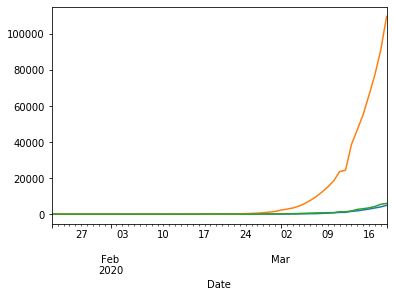

In [243]:
ax = plt.gca()
e_deaths.groupby('Date').Deaths.sum().plot(kind='line', x='Date', y='Deaths', ax=ax)
e_confirmed.groupby('Date').Confirmed.sum().plot(kind='line', x='Date', y='Confirmed', ax=ax)
e_recovered.groupby('Date').Recovered.sum().plot(kind='line', x='Date', y='Recovered', ax=ax)
plt.show()